

# EDA, Feature Engineering then LR, DT, RF models on the Titanic dataset




### Import libraries

In [1]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")


## Reading the data

In [2]:
df_train = pd.read_csv('data/train.csv')
X_test = pd.read_csv('data/test.csv')
df_train
#X_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df_train.shape, X_test.shape

((891, 12), (418, 11))

### Separate features and label (target)
- `X`:= is the array of features used to predict. It's a multidimensional array (or matrix, or a dataframe in pandas)
- `y`:= is the array of labels to be predicted. It's an array with a single dimension (or a vector, or a series in pandas)

In [5]:
X_train = df_train.loc[:, df_train.columns != 'Survived']
y_train = df_train['Survived'].to_frame()

# We do not touch test(unseen) data till last step

In the Titanic dataset your y is the column **Survived**

### Train-Test split

In [6]:
#!conda install -c conda-forge scikit-learn
#!pip install scikit-learn

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# using the train test split function
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train ,
                                   random_state=104,
                                   stratify=y_train,
                                   test_size=0.2, 
                                   shuffle=True)


In [9]:
# Always check the shape of your train and test arrays to check if this was done correctly
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((712, 11), (179, 11), (712, 1), (179, 1))

In [10]:
# Combine back Xtrain, ytrain

df_train = pd.concat([X_train,y_train], axis=1)
df_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
805,806,3,"Johansson, Mr. Karl Johan",male,31.0,0,0,347063,7.775,NaN,S,0
665,666,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.500,NaN,S,0
320,321,3,"Dennis, Mr. Samuel",male,22.0,0,0,A/5 21172,7.250,NaN,S,0
667,668,3,"Rommetvedt, Mr. Knud Paust",male,NaN,0,0,312993,7.775,NaN,S,0
763,764,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.000,B96 B98,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
452,453,1,"Foreman, Mr. Benjamin Laventall",male,30.0,0,0,113051,27.750,C111,C,0
376,377,3,"Landergren, Miss. Aurora Adelia",female,22.0,0,0,C 7077,7.250,NaN,S,1
282,283,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.500,NaN,S,0
612,613,3,"Murphy, Miss. Margaret Jane",female,NaN,1,0,367230,15.500,NaN,Q,1


In [11]:
df_train.info()  # type of all columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 805 to 634
Data columns (total 12 columns):
PassengerId    712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            564 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Cabin          162 non-null object
Embarked       710 non-null object
Survived       712 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [12]:
df_train.isna().sum()  #Age, Cabin and Embarked has missing values

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            148
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          550
Embarked         2
Survived         0
dtype: int64

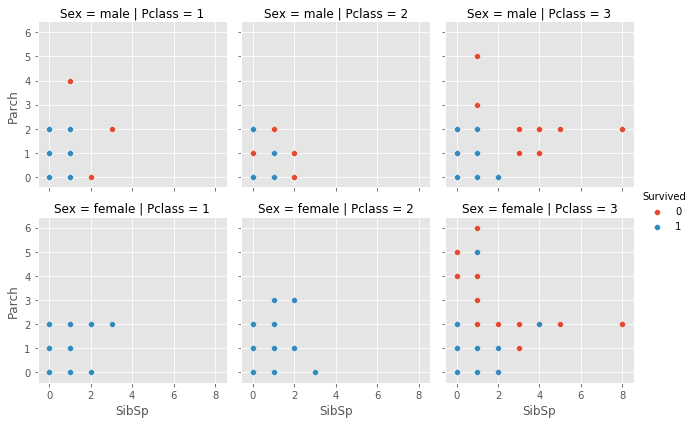

In [13]:
g = sns.FacetGrid(data=df_train, hue='Survived', col='Pclass', row='Sex')
g.map(sns.scatterplot, 'SibSp', 'Parch')
g.add_legend()
plt.show()

## Featuring Engeneering

In [14]:
#1)  PassengerId  
#2)  Pclass   ordinal categorical--> one-hot-encode
#3)  Name         
#4)  Sex     one-hot-encode
#5)  Age     imputation the missing values and bins (young, middle-aged, old)
#6)  SibSp        
#7)  Parch        
#8)  Ticket       
#9)  Fare     scaling
#10) Cabin        
#11) Embarked  imputation, one-hot-encode 
#12) Survived

## Create ML pipeline

In [15]:
impute_and_then_bin = make_pipeline(SimpleImputer(strategy = 'median'), 
                                    KBinsDiscretizer(encode='onehot-dense'))

impute_and_then_ohe = make_pipeline(SimpleImputer(strategy = 'most_frequent'), 
                                    OneHotEncoder(sparse = False, drop = 'first'))

impute_and_then_scal = make_pipeline(SimpleImputer(strategy = 'median'), 
                                     MinMaxScaler())


In [16]:
# got the error with impute_and_then_ohe = make_pipeline(SimpleImputer(strategy = 'median'), 
                                    #OneHotEncoder(sparse = False, drop = 'first'))

In [17]:
#it is tuple (name, transformer,columns)
fe = ColumnTransformer([('ohe_isclass', OneHotEncoder(sparse=False), ['Pclass']),
                        ('ohe_issex', OneHotEncoder(sparse=False), ['Sex']),
                        ('impute_and_then_bin', impute_and_then_bin, ['Age']),
                        ('impute_and_then_scal', impute_and_then_scal, ['Fare']),
                        ('impute_and_then_ohe', impute_and_then_ohe, ['Embarked'])
                       ])

fe

ColumnTransformer(transformers=[('ohe_isclass', OneHotEncoder(sparse=False),
                                 ['Pclass']),
                                ('ohe_issex', OneHotEncoder(sparse=False),
                                 ['Sex']),
                                ('impute_and_then_bin',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(encode='onehot-dense'))]),
                                 ['Age']),
                                ('impute_and_then_scal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['Fare']),
                                ('impute_and_then_ohe',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False))]),
                                 ['Embarked'])])

In [18]:
# fit the column transformer on the training data
fe.fit(X_train)


# transform the training data
X_train_tran = fe.transform(X_train)
pd.DataFrame(X_train_tran, columns= fe.get_feature_names_out())

/home/nazila/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/nazila/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/nazila/.local/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/nazila/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ig

,ohe_isclass__Pclass_1,ohe_isclass__Pclass_2,ohe_isclass__Pclass_3,ohe_issex__Sex_female,ohe_issex__Sex_male,impute_and_then_bin__Age_0.0,impute_and_then_bin__Age_1.0,impute_and_then_bin__Age_2.0,impute_and_then_bin__Age_3.0,impute_and_then_scal__Fare,impute_and_then_ohe__Embarked_Q,impute_and_then_ohe__Embarked_S
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.015176,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.143462,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.014151,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.015176,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.234224,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
707,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.054164,0.0,0.0
708,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.014151,0.0,1.0
709,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.018543,0.0,1.0
710,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.030254,1.0,0.0


In [19]:
# transform the validation and test data
X_val_tran = fe.transform(X_val)
pd.DataFrame(X_val_tran, columns= fe.get_feature_names_out())

X_test_tran = fe.transform(X_test)
#in machine learning pipeline at first I did not consider imputation for Fare, 
#I got an error for a nan value on test data, so I added imputation for Fare afterwards.
pd.DataFrame(X_test_tran, columns= fe.get_feature_names_out()).isna().sum()


ohe_isclass__Pclass_1              0
ohe_isclass__Pclass_2              0
ohe_isclass__Pclass_3              0
ohe_issex__Sex_female              0
ohe_issex__Sex_male                0
impute_and_then_bin__Age_0.0       0
impute_and_then_bin__Age_1.0       0
impute_and_then_bin__Age_2.0       0
impute_and_then_bin__Age_3.0       0
impute_and_then_scal__Fare         0
impute_and_then_ohe__Embarked_Q    0
impute_and_then_ohe__Embarked_S    0
dtype: int64

## Train on the logistic regression model

In [20]:
type(y_train)

pandas.core.frame.DataFrame

In [21]:
# initialize the model 

lr_ml = LogisticRegression()

# fit the model on the transformed training data
lr_ml.fit(X_train_tran, y_train)
lr_ml_prediction_train = lr_ml.predict(X_train_tran)
round(accuracy_score(y_train, lr_ml_prediction_train), 2)

/home/nazila/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.79

### Prediction on the (transformed) validation data

In [22]:
# calculate predictions with the transformed validation data

# calculate an accuracy score
lr_ml_prediction_val = lr_ml.predict(X_val_tran)
round(accuracy_score(y_val, lr_ml_prediction_val), 2)

0.82

### Predict on the (transformed) test data

In [23]:
lr_ml_prediction_test = lr_ml.predict(X_test_tran)

In [24]:
# Building the model together with feature engeenering
one_go_mlr= make_pipeline(fe, LogisticRegression(max_iter=10000))
one_go_mlr

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ohe_isclass',
                                                  OneHotEncoder(sparse=False),
                                                  ['Pclass']),
                                                 ('ohe_issex',
                                                  OneHotEncoder(sparse=False),
                                                  ['Sex']),
                                                 ('impute_and_then_bin',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('kbinsdiscretizer',
                                                                   KBinsDiscretizer(encode='onehot-dense'))]),
                                                  ['Age']),
                                                 ('impute_and_t...cal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Fare']),
                                                 ('impute_and_then_ohe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['Embarked'])])),
                ('logisticregression', LogisticRegression(max_iter=10000))])

In [25]:
one_go_mlr.fit(X_train,y_train)

/home/nazila/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/nazila/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/nazila/.local/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/nazila/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ig

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ohe_isclass',
                                                  OneHotEncoder(sparse=False),
                                                  ['Pclass']),
                                                 ('ohe_issex',
                                                  OneHotEncoder(sparse=False),
                                                  ['Sex']),
                                                 ('impute_and_then_bin',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('kbinsdiscretizer',
                                                                   KBinsDiscretizer(encode='onehot-dense'))]),
                                                  ['Age']),
                                                 ('impute_and_t...cal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Fare']),
                                                 ('impute_and_then_ohe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['Embarked'])])),
                ('logisticregression', LogisticRegression(max_iter=10000))])

In [26]:
one_go_mlr.score(X_val,y_val)

0.8212290502793296

## Train on the Decision Tree model

In [27]:
df_train.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
PassengerId,1.000000,-0.058539,0.035277,-0.056786,0.008876,0.033404,-0.031451
Pclass,-0.058539,1.000000,-0.374011,0.072171,-0.014945,-0.547049,-0.329215
Age,0.035277,-0.374011,1.000000,-0.289391,-0.167788,0.099575,-0.065970
SibSp,-0.056786,0.072171,-0.289391,1.000000,0.413644,0.146453,-0.054464
Parch,0.008876,-0.014945,-0.167788,0.413644,1.000000,0.224170,0.063748
Fare,0.033404,-0.547049,0.099575,0.146453,0.224170,1.000000,0.257160
Survived,-0.031451,-0.329215,-0.065970,-0.054464,0.063748,0.257160,1.000000


In [28]:
df_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
805,806,3,"Johansson, Mr. Karl Johan",male,31.0,0,0,347063,7.775,NaN,S,0
665,666,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.500,NaN,S,0
320,321,3,"Dennis, Mr. Samuel",male,22.0,0,0,A/5 21172,7.250,NaN,S,0
667,668,3,"Rommetvedt, Mr. Knud Paust",male,NaN,0,0,312993,7.775,NaN,S,0
763,764,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.000,B96 B98,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
452,453,1,"Foreman, Mr. Benjamin Laventall",male,30.0,0,0,113051,27.750,C111,C,0
376,377,3,"Landergren, Miss. Aurora Adelia",female,22.0,0,0,C 7077,7.250,NaN,S,1
282,283,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.500,NaN,S,0
612,613,3,"Murphy, Miss. Margaret Jane",female,NaN,1,0,367230,15.500,NaN,Q,1


In [29]:
type(y_train.squeeze())

pandas.core.series.Series

In [30]:
# initialize the model 

clf_DT = DecisionTreeClassifier(max_depth=3, random_state=42)   #max_depth=4 gives 0.8 acc  

# fit the model on the transformed training data
clf_DT.fit(X_train_tran, y_train)

clf_DT_prediction_train = clf_DT.predict(X_train_tran)
round(accuracy_score(y_train, clf_DT_prediction_train), 2)



0.81

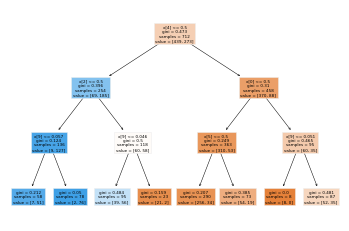

In [31]:
plot_tree(
    clf_DT, 
    filled = True
    );

## Evaluate the model on the (transformed) validation data

In [32]:
# calculate predictions with the transformed test data

# calculate an accuracy score
clf_DT_predictions = clf_DT.predict(X_val_tran)
round(accuracy_score(y_val, clf_DT_predictions), 2)


0.83

## Predict on the (transformed) validation data

In [33]:
clf_DT_prediction_test = clf_DT.predict(X_test_tran)

## Train on the transformed data with Random Forest model

In [34]:
# Building the model together with feature engeenering
# initialize the model 

rf = RandomForestClassifier(n_estimators=20, max_depth=2)  #n_estimators=10 acc is less
rf.fit(X_train_tran, y_train)

rf_prediction_train = rf.predict(X_train_tran)
round(accuracy_score(y_train, rf_prediction_train), 2)

<ipython-input-34-1fb459c9d874>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_tran, y_train)


0.79

In [35]:
rf.feature_importances_

array([0.0605764 , 0.01056172, 0.16416439, 0.35949751, 0.21565972,
       0.00306258, 0.00068559, 0.00253974, 0.        , 0.15791338,
       0.00107377, 0.0242652 ])

## Train on the untransformed data with Random Forest model

In [36]:
#rf = RandomForestClassifier(n_estimators=20, max_depth=2)  #n_estimators=10 acc is less
#rf.fit(X_train, y_train)

#rf_prediction_train2 = rf.predict(X_train)
#round(accuracy_score(y_train, rf_prediction_train2), 2)

## Evaluate the model on the (transformed) validation data

In [37]:
# calculate an accuracy score
rf_prediction_val = rf.predict(X_val_tran)
round(accuracy_score(y_val, rf_prediction_val), 2)

0.81

## Evaluate the model on the test data

In [39]:
rf_prediction_val = rf.predict(X_test_tran)
#rf_prediction_val